# PROJETO DE ANÁLISE DE DADOS

#### O projeto busca analisar o preço, sua mudança percentual e outros aspectos de materias brutas da agricultura, como algodão, coura e alguns tipos de madeira

In [2]:
# Importações

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando conjunto de dados 

df = pd.read_csv('agricultural_raw_material.csv')

### Explorando conjunto de dados

In [4]:
#Verificando os tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [5]:
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [6]:
# Verificando valores nulos

df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [7]:
# Corrigindo dados inválidos, nulos e incorretos
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Retirando valores NaN
df = df.dropna()

# Checando db
df.isnull().sum()

# Convertendo tipos de dados para float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [8]:
# Alterando coluna de data
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexando Month
df = df.set_index('Month')

### Análise Exploratória

In [9]:
#Configurando parámetros

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#00000000'

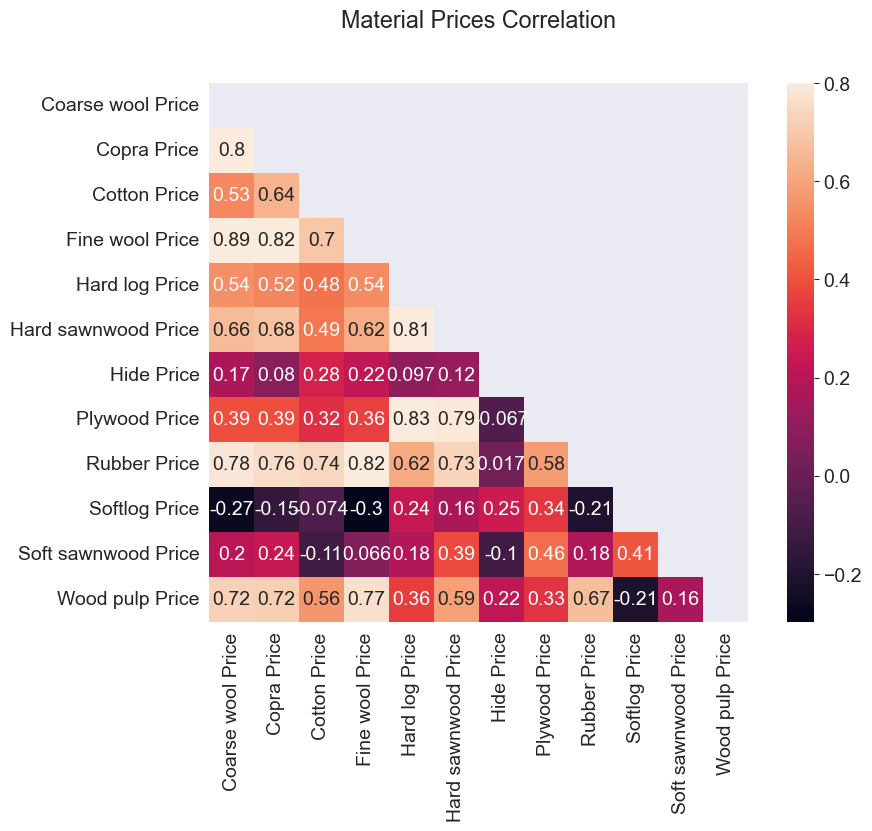

In [10]:
#Lista de materiais
raw_data = ['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#Correalação do preço dos materiais
corrmat = df[raw_data].corr()
#Máscara para parte superior direita do gráfico
mask = np.triu(np.ones_like(corrmat, dtype = bool))
#Gerando o gráfico
sns.heatmap(corrmat, vmax=0.8,mask=mask, square=True, annot=True)
plt.title('Material Prices Correlation', pad= 40)
plt.show()




## Correlação Positiva Forte
- Coarse wool Price e Fine wool Price (0.89): Esses dois tipos de lã têm uma correlação muito alta, indicando que os preços tendem a variar juntos. Isso pode ser devido à similaridade dos produtos e fatores de mercado comuns.
- Copra Price e Coarse wool Price (0.8): Há uma correlação alta entre o preço do copra e o preço da lã grossa. Isso pode sugerir que ambos os produtos podem ser influenciados por fatores econômicos ou de mercado similares.
## Correlação Moderada
- Hard sawnwood Price e Hard log Price (0.81): Existe uma correlação alta entre esses dois tipos de madeira, o que faz sentido, pois o preço da madeira serrada dura provavelmente depende do preço da madeira em toras duras.
- Rubber Price e várias outras variáveis: O preço da borracha tem correlações moderadas a fortes com vários outros preços, como Hard log Price (0.62) e Fine wool Price (0.74). Isso sugere que o preço da borracha pode estar influenciado por fatores de mercado amplos que também afetam outros materiais.
## Correlação Negativa ou Fraca
- Softlog Price e Coarse wool Price (-0.27): Há uma correlação negativa entre o preço da madeira macia e o preço da lã grossa, sugerindo que quando um preço sobe, o outro tende a cair, embora essa correlação não seja forte.
- Softlog Price e Copra Price (-0.15): Similarmente, há uma correlação negativa fraca entre o preço da madeira macia e o preço do copra.
## Implicações Práticas
- Diversificação de Portfólio: Investidores ou empresas que negociam esses materiais podem usar essas informações para diversificar seus portfólios. Por exemplo, combinar materiais com correlações fracas ou negativas pode ajudar a reduzir riscos.
- Previsão de Preços: A compreensão das correlações pode ser útil para prever movimentos de preços. Se um material com alta correlação começa a mudar de preço, pode-se esperar que o outro siga uma tendência similar.

<function matplotlib.pyplot.show(close=None, block=None)>

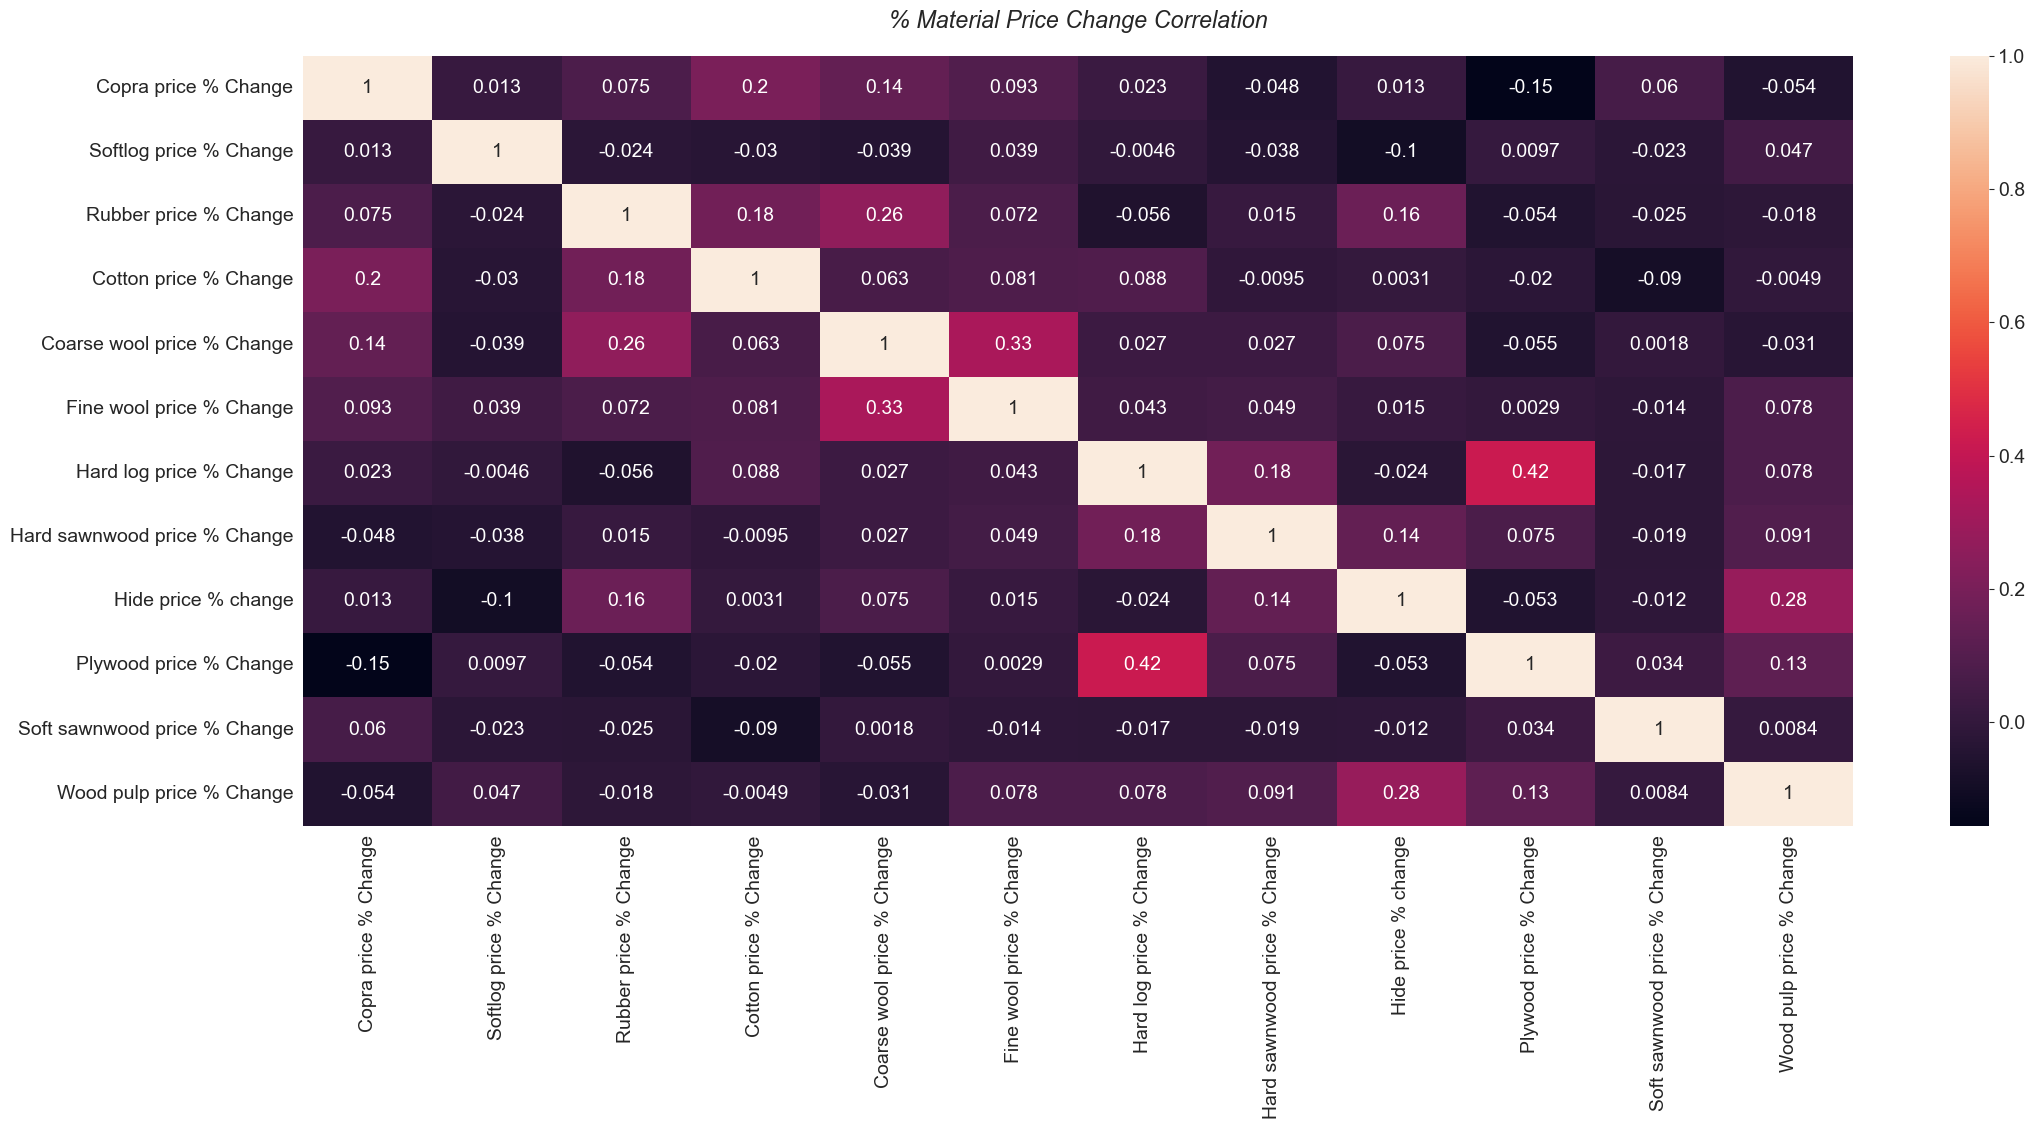

In [11]:
#Lista da variação % de preços
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change',
            'Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change',
            'Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']

corrchange = df[changelist].corr()
#Criando máscara
mask_change = np.triu(np.ones_like(corrchange, dtype=bool))
#Criando gráfico
plt.figure(figsize=(25,10))
sns.heatmap(corrchange, annot=True)
plt.title('% Material Price Change Correlation', pad=20, fontstyle = 'oblique')
plt.show


## Comparação das Correlações de Preços Absolutos e Variações Percentuais
#### Correlações de Preços Absolutos
No gráfico anterior, que exibia as correlações dos preços absolutos dos materiais, observamos várias correlações fortes e moderadas entre diferentes materiais. Por exemplo:

- Coarse wool Price e Fine wool Price (0.89)
- Hard sawnwood Price e Hard log Price (0.81)
- Rubber Price e vários outros preços
Essas correlações indicavam que os preços desses materiais tendiam a se mover juntos, possivelmente devido a fatores de mercado comuns.

#### Correlações de Variações Percentuais
O novo gráfico mostra as correlações entre as variações percentuais dos preços dos materiais, o que reflete a relação entre como os preços mudam ao longo do tempo.

## Observações e Comparações
#### 1. Coarse wool Price % Change e Fine wool Price % Change (0.33):

Embora a correlação entre os preços absolutos fosse muito alta (0.89), a correlação entre as variações percentuais dos preços é moderada (0.33). Isso sugere que, enquanto os preços absolutos se movem de forma muito semelhante, as variações nos preços não são tão fortemente relacionadas.

#### 2. Hard sawnwood Price % Change e Plywood price % Change (0.42):

Esta é uma correlação moderada, indicando que as mudanças percentuais nos preços da madeira serrada dura e da madeira compensada tendem a se mover juntas, embora não tão fortemente quanto os preços absolutos (0.81 no gráfico anterior).

#### 3. Hide price % Change e Wood pulp price % Change (0.28):

Esta correlação é relativamente baixa, mas ainda significativa, mostrando que as variações percentuais nos preços do couro e da polpa de madeira têm alguma relação.

#### 4. Correlação Fraca ou Negativa:

Muitos pares de materiais apresentam correlações fracas ou negativas nas variações percentuais, como Softlog price % Change e Coarse wool price % Change (-0.039). Isso sugere que, embora os preços absolutos possam ter correlações moderadas, suas variações percentuais são menos sincronizadas.

## Análise Geral

#### Diferenças nas Correlações:

As correlações entre preços absolutos são geralmente mais altas do que entre as variações percentuais. Isso é esperado, pois os preços absolutos são afetados por tendências de longo prazo e fatores comuns de mercado, enquanto as variações percentuais refletem mudanças de curto prazo que podem ser influenciadas por uma variedade maior de fatores independentes.

#### Importância das Variações Percentuais:

As correlações entre as variações percentuais dos preços são importantes para entender como os preços dos materiais reagem a eventos de curto prazo, como mudanças nas políticas econômicas, flutuações de oferta e demanda, ou outros choques de mercado.

#### Implicações para a Análise de Mercado:

Investidores e analistas devem considerar tanto as correlações de preços absolutos quanto as de variações percentuais para obter uma imagem completa da dinâmica de preços. Enquanto os preços absolutos fornecem uma visão geral das tendências de longo prazo e das relações entre os materiais, as variações percentuais ajudam a identificar como os preços respondem a mudanças mais imediatas e temporárias no mercado.

## Resumo da análise

Em resumo, enquanto o gráfico de preços absolutos mostra relações mais estáveis e de longo prazo entre os preços dos materiais, o gráfico de variações percentuais destaca a volatilidade e as respostas de curto prazo nos mercados de materiais. Ambas as perspectivas são essenciais para uma análise completa e informada.


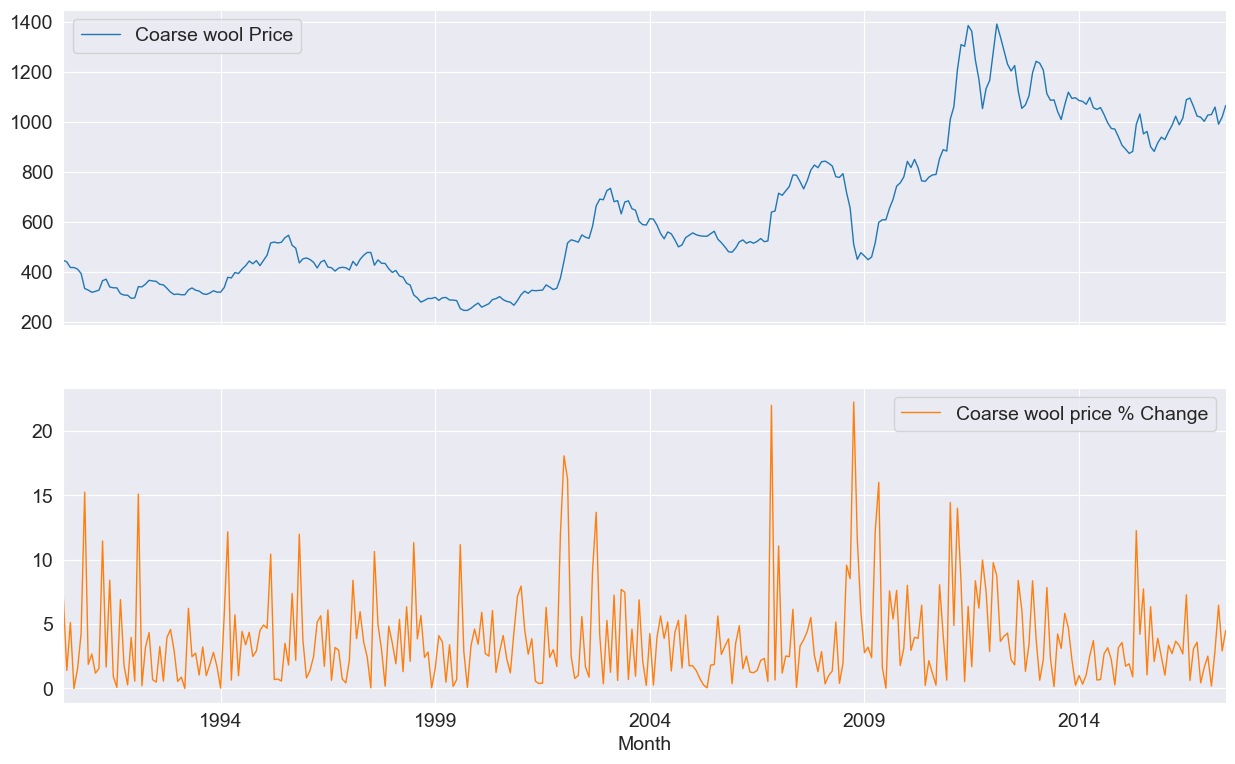

In [12]:
# Analisando a lã grossa

axes = df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(15,9), subplots=True, linewidth = 1)

## Perguntas de negócios

#### Qual a variação do preço de cada matérial?

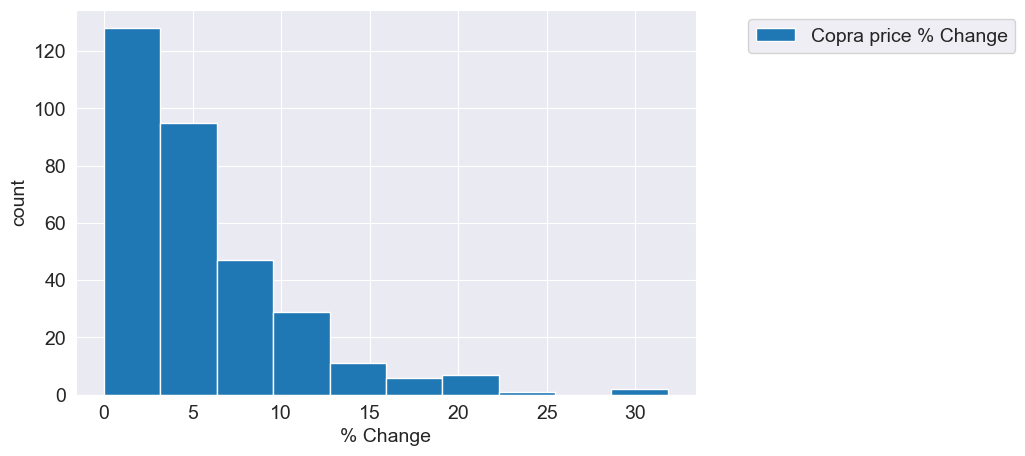

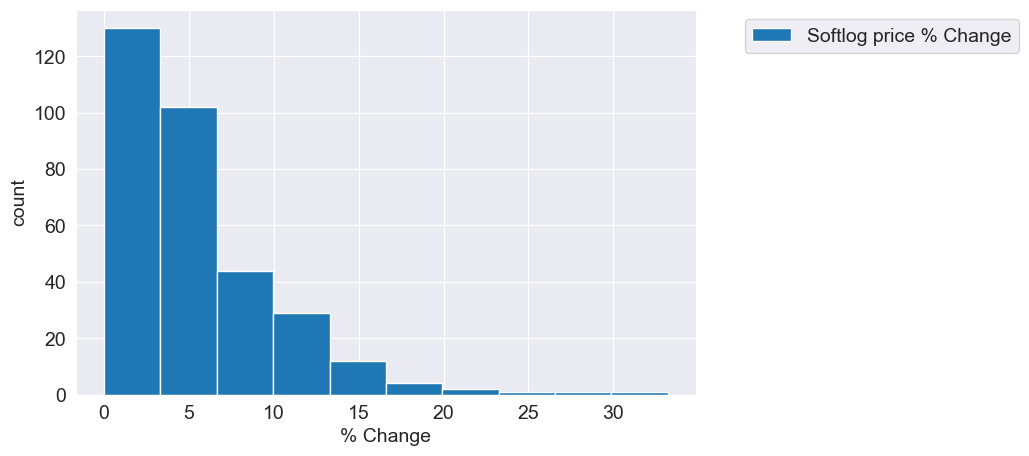

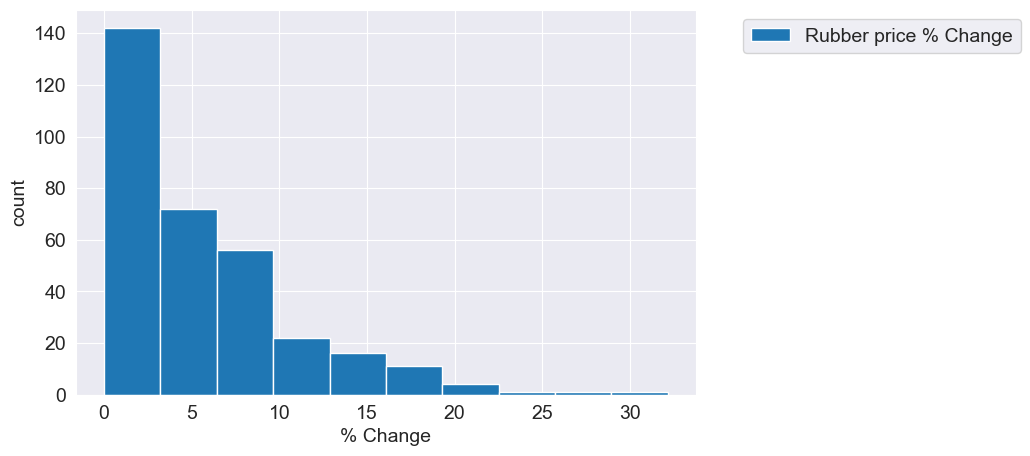

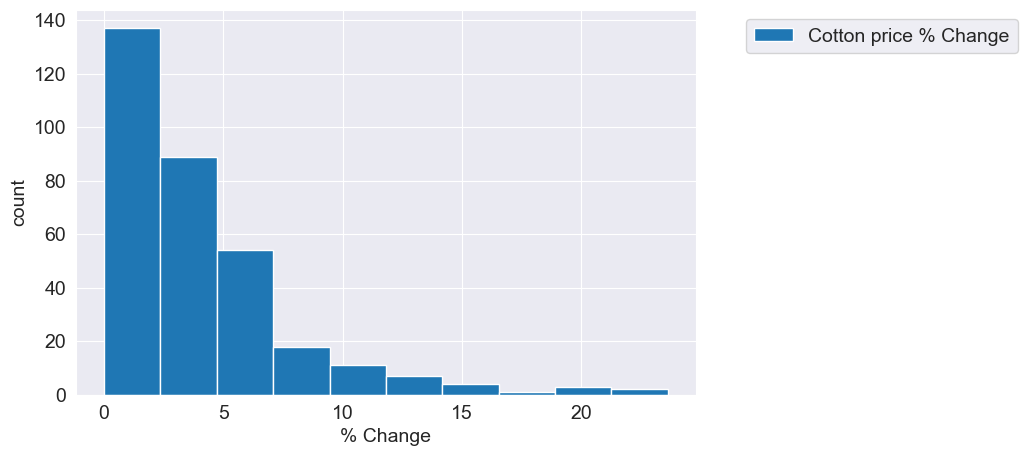

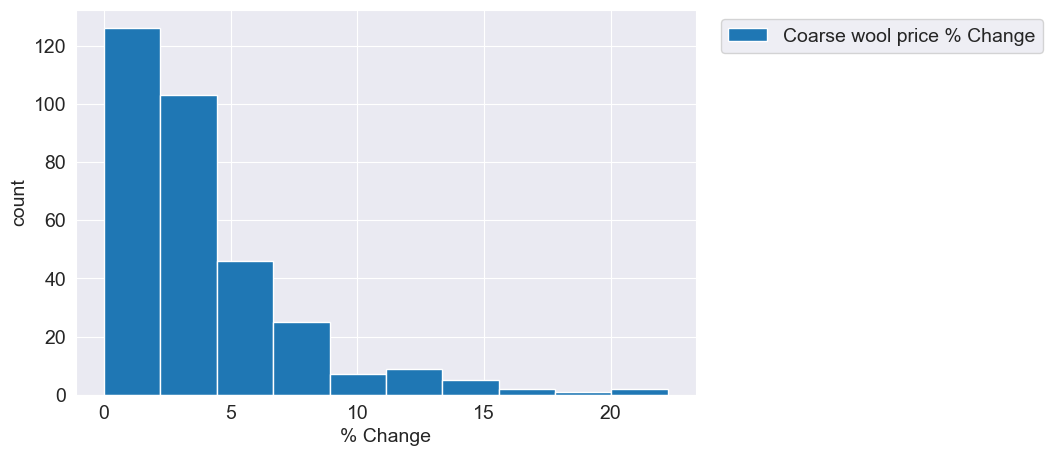

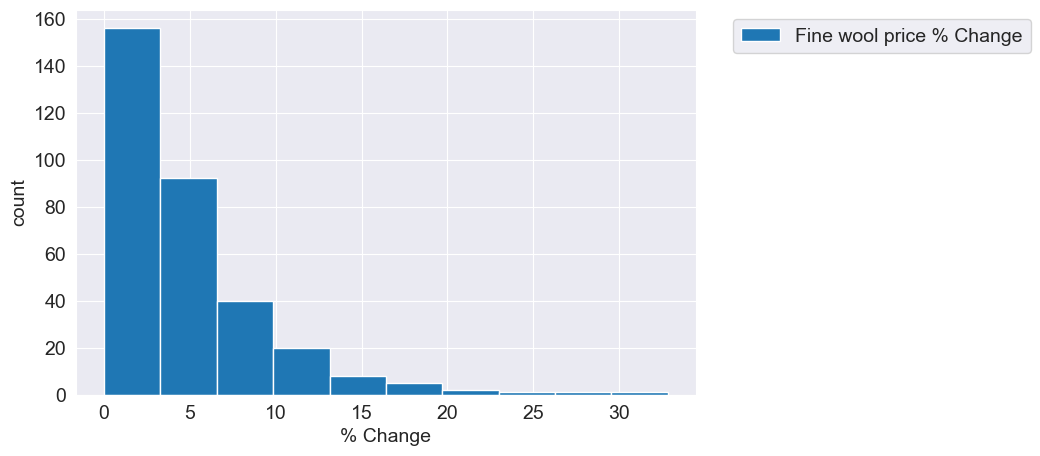

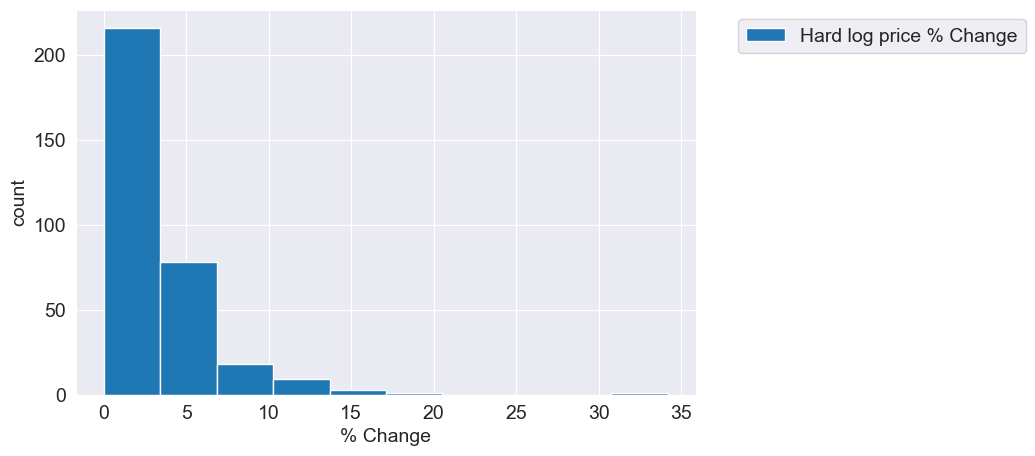

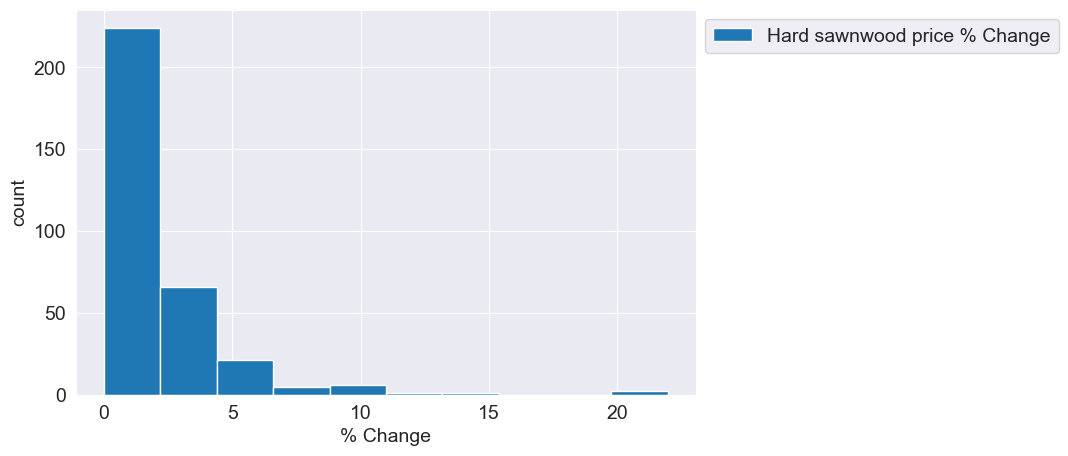

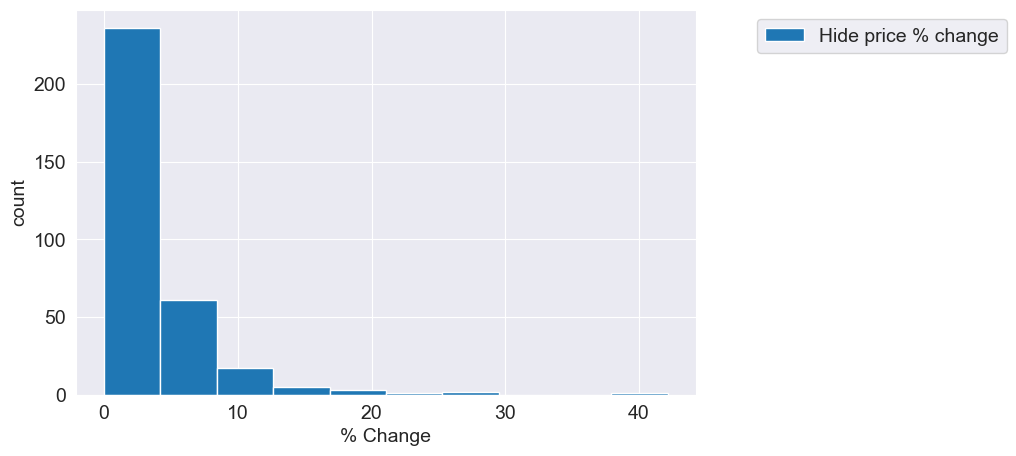

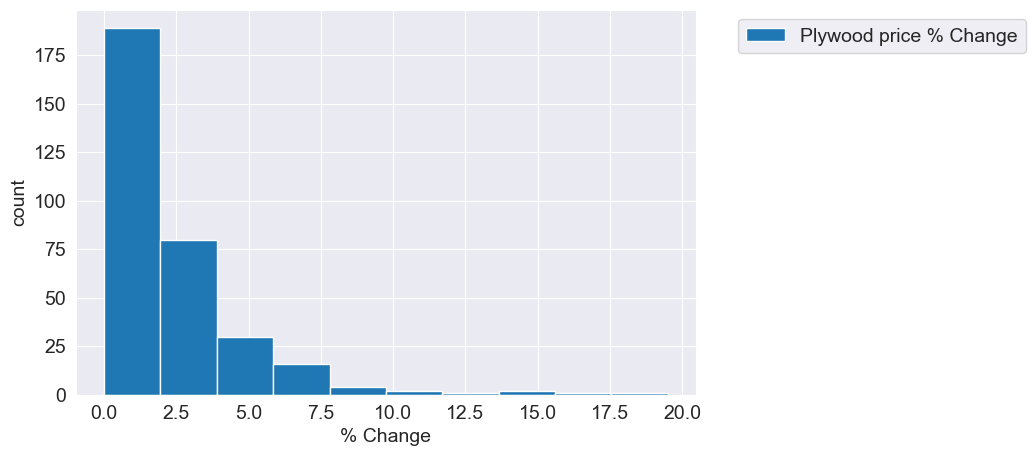

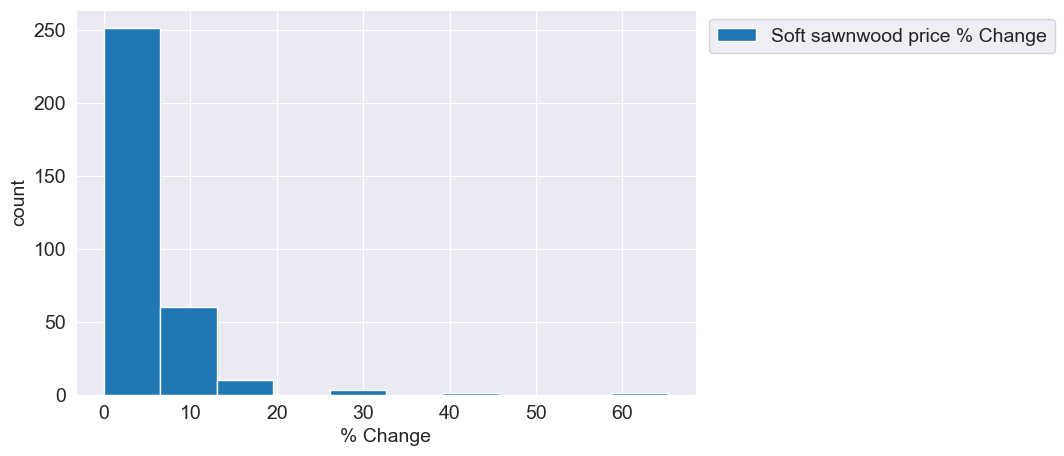

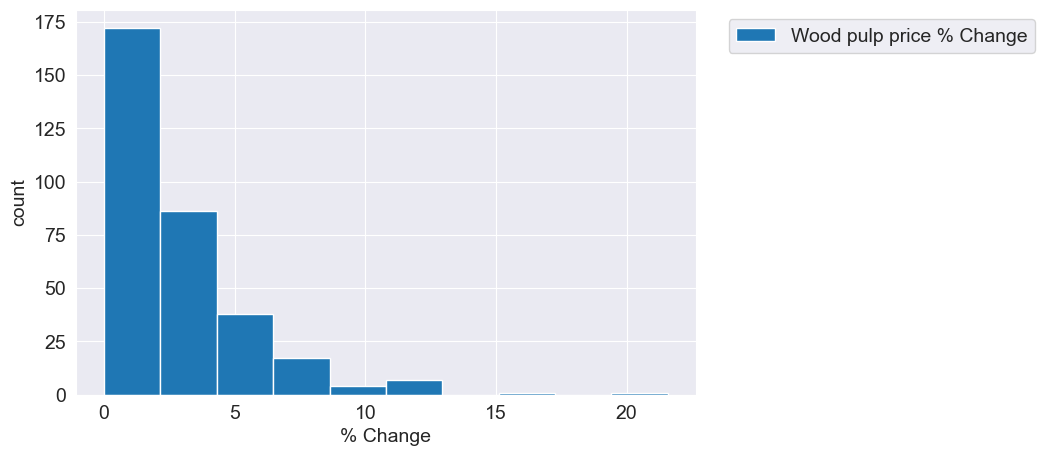

In [27]:
for i in range (len(changelist)):
    plt.figure(figsize=(8,5))
    df[changelist[i]].hist()
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:], loc = 'upper center', bbox_to_anchor = (1.3, 1))



Com os gráficos acima, podemos observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%


#### Qual o material com menos preço ao longo dos anos?

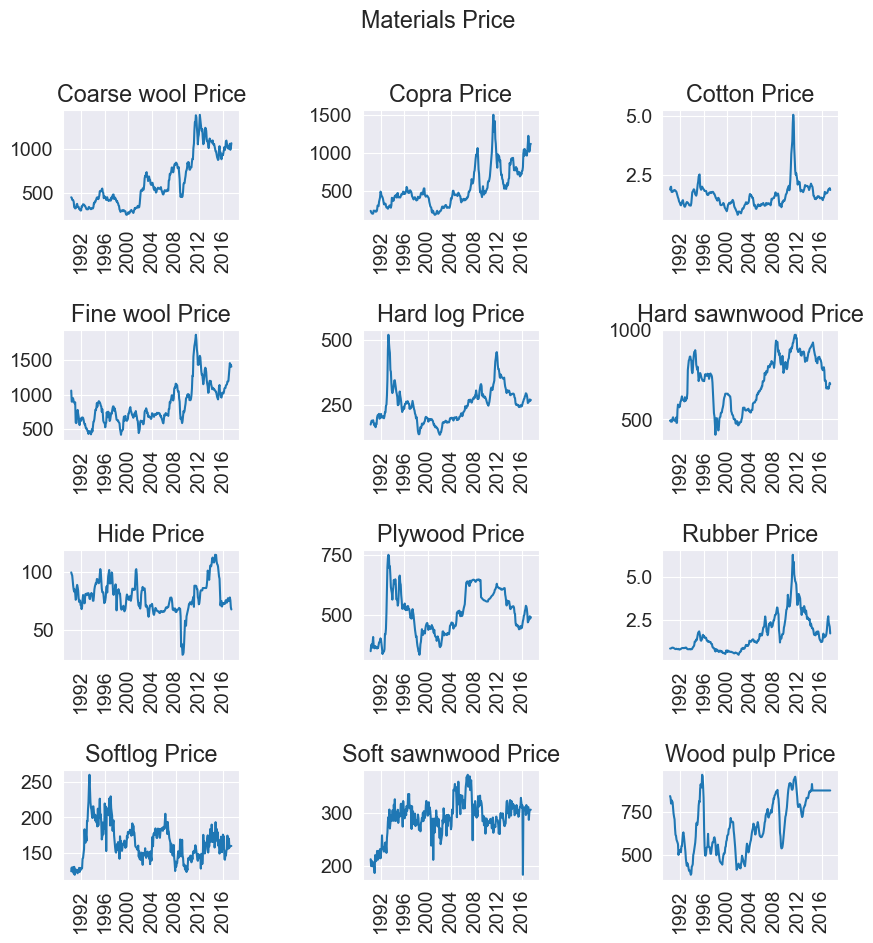

In [34]:
plt.figure(figsize=(10,10))
for i in range (len(raw_data)):
    plt.subplot(4,3, i + 1)
    plt.subplots_adjust(hspace=1 ,wspace=0.7)
    plt.plot(df[raw_data[i]])
    plt.xticks(rotation = 90)
    plt.title(raw_data[i])
    plt.suptitle('Materials Price')

Ao analisarmos o eixo Y dos gráficos acima, observamos a escala de preço do material e os materiais com a menor escala de preço são a borracha(rubber) e o algodão(cotton)

Text(0, 0.5, 'Price')

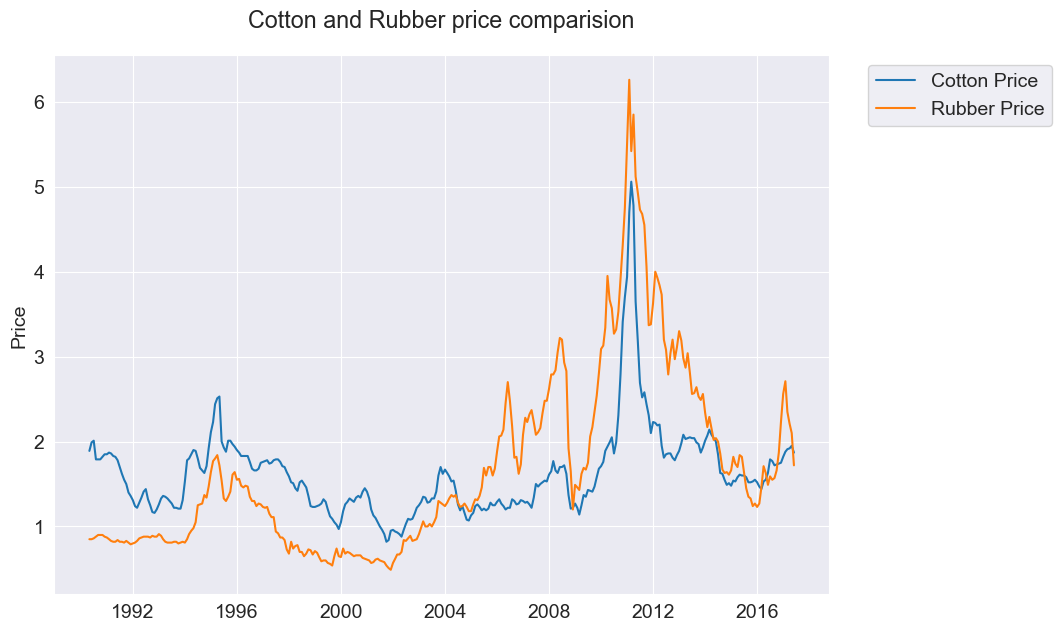

In [52]:
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.legend(df[['Cotton Price', 'Rubber Price']], bbox_to_anchor = (1.3,1))
plt.title('Cotton and Rubber price comparision', pad= 20)
plt.ylabel('Price')



                  index          0
0          Cotton Price     528.36
1          Rubber Price     542.23
2            Hide Price   25591.30
3         Softlog Price   53679.82
4        Hard log Price   81256.68
5   Soft sawnwood Price   94958.42
6         Plywood Price  166268.86
7           Copra Price  172795.57
8     Coarse wool Price  204328.79
9       Wood pulp Price  221097.23
10  Hard sawnwood Price  230949.86
11      Fine wool Price  276917.47


Text(0, 0.5, 'Price')

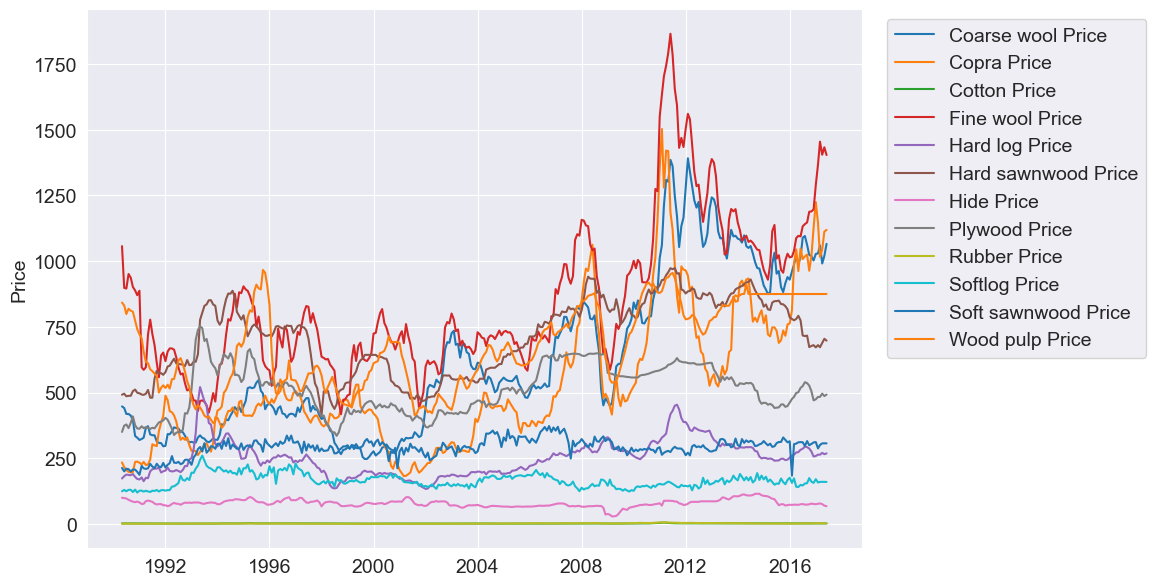

In [68]:
lower_price = pd.DataFrame(df[raw_data]).sum().sort_values().reset_index()
print(lower_price)

plt.plot(df[raw_data])
plt.legend(df[raw_data], loc='upper center',bbox_to_anchor=(1.2,1))
plt.ylabel('Price')

#### Com relação a variação percentual, qual material apresenta a menor? E qual o material que apresenta a maior?

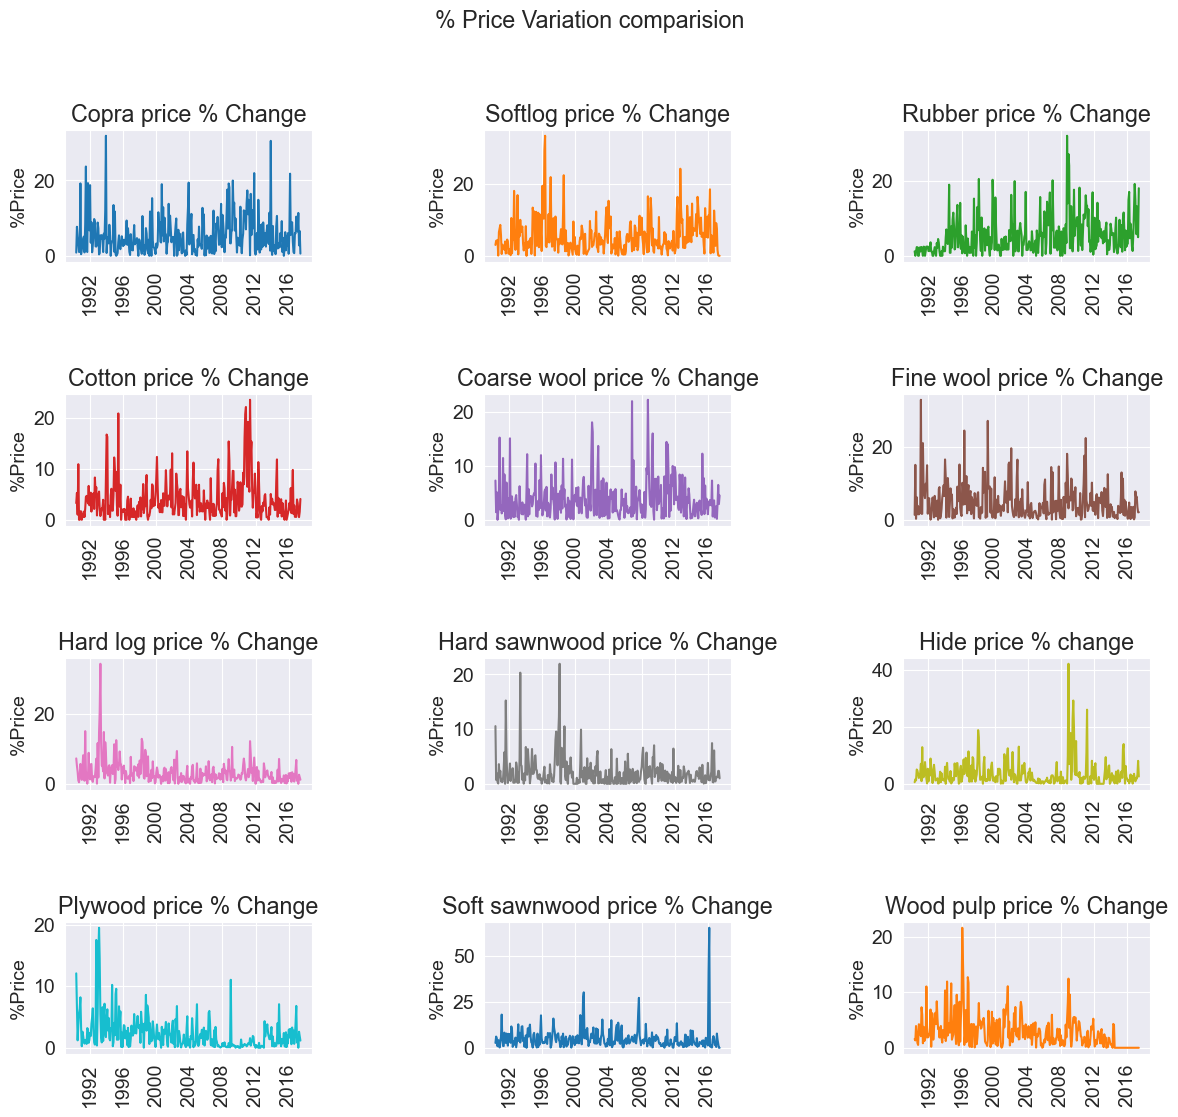

In [78]:
plt.figure(figsize=(14,12))
colors = plt.get_cmap('tab10').colors

for i in range(len(changelist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=1,wspace=0.7)
    plt.plot(df[changelist[i]], color=colors[i % len(colors)])
    plt.xticks(rotation = 90)
    plt.ylabel('%Price')
    plt.title(changelist[i])
    plt.suptitle('% Price Variation comparision')

Semelhante a pergunta passada, primeiranmente analisaremos o eixo Y e filtraremos os materiais com a menor escala de varianção percentual